<a href="https://colab.research.google.com/github/Mark12481632/Machine-Learning/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set seed
np.random.seed(1432)

# Output format.
np.set_printoptions(linewidth=100)

In [4]:
# Functions:
def generate_data_points_1(num_pts=100):
  """
  Generate the initial data points.  X and y have basic linear relation and
  X is of dim=1
  """
  theta = np.array([-7.23, 2.75])
  X0 = np.ones(num_pts)
  X1 = np.random.uniform(low=0, high=100, size=num_pts)
  X = np.column_stack((X0, X1))
  y = X1 * theta[1] + X0 * theta[0] + np.random.normal(loc=0.0, scale=6, size=num_pts)
  return (X.reshape(num_pts, 2), y.reshape(num_pts, 1))


def optimal_theta(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

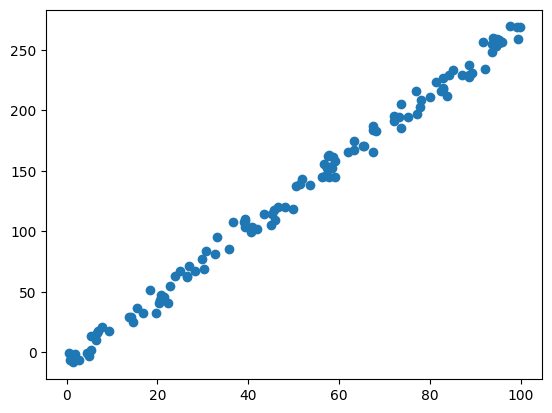

In [5]:
# Plot points
X, y = generate_data_points_1(num_pts=120)

plt.scatter(X[:,1], y[:,0])

[[-8.24357367]
 [ 2.7683836 ]]


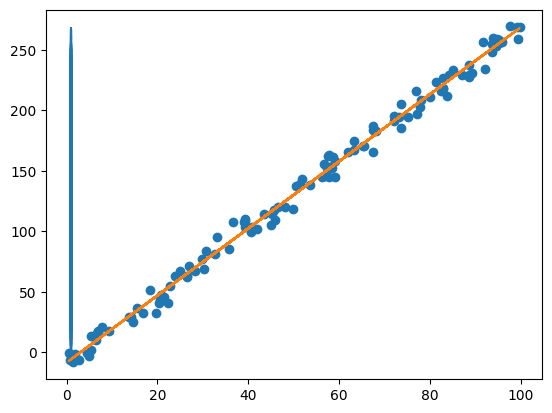

In [6]:
# Initial setup:
theta_opt = optimal_theta(X, y)

# Print line with data:
plt.scatter(X[:,1], y[:,0])

# Plot optimal line.
y_vals = X @ theta_opt

plt.plot(X, y_vals)

print(theta_opt)

Do same using Stochastic Gradient Descent (SGD)

In [15]:
def data_points_sgd(num_pts=100):
  theta = np.array([-1.8, 7.2, -9.1, 6.1]).reshape(4,1)

  X0 = np.ones(num_pts)
  X1 = np.random.uniform(low=20, high=100, size=num_pts)
  X2 = np.random.uniform(low=20, high=100, size=num_pts)
  X3 = np.random.uniform(low=20, high=100, size=num_pts)
  X = np.column_stack((X0, X1, X2, X3))

  y = X.dot(theta) + np.random.normal(loc=0, scale=10, size=num_pts).reshape(num_pts,1)
  return (X, y)

In [22]:
X, y = data_points_sgd(500)

theta_actual = np.array([-1.8, 7.2, -9.1, 6.1])

y_pred = X.dot(theta_actual)
diff = y - y_pred
print("Mean Error:", np.mean(diff**2))

Mean Error: 188551.85986512565


In [23]:
n,d = X.shape

theta_test = np.array([1, 1, 1, 1]).reshape(4,1)

learning_rate = 1e-4

max_epochs = 20000
epoch_cnt = 0
min_cost = 1e-5
cost = 1

while cost > min_cost:
  epoch_cnt += 1
  if epoch_cnt > max_epochs:
    print("** Max Epochs **")
    break

  y_pred = X.dot(theta_test)
  y_diff = y - y_pred
  cost = np.mean(y_diff**2)

  if (epoch_cnt==1) or (epoch_cnt) % 1000 == 0:
    print(f"*******Epoch:{epoch_cnt}, Cost:{cost:.5f}, Learning-Rate:{learning_rate:.10f} *******")
    learning_rate = learning_rate/1.025

  delta_theta = X.T.dot(y_diff)*learning_rate/n
  theta_test = theta_test + delta_theta


print()
print(theta_actual)
print(theta_test)


*******Epoch:1, Cost:96124.06318, Learning-Rate:0.0001000000 *******
*******Epoch:1000, Cost:103.87294, Learning-Rate:0.0000975610 *******
*******Epoch:2000, Cost:103.86788, Learning-Rate:0.0000951814 *******
*******Epoch:3000, Cost:103.86300, Learning-Rate:0.0000928599 *******
*******Epoch:4000, Cost:103.85827, Learning-Rate:0.0000905951 *******
*******Epoch:5000, Cost:103.85370, Learning-Rate:0.0000883854 *******
*******Epoch:6000, Cost:103.84928, Learning-Rate:0.0000862297 *******
*******Epoch:7000, Cost:103.84500, Learning-Rate:0.0000841265 *******
*******Epoch:8000, Cost:103.84087, Learning-Rate:0.0000820747 *******
*******Epoch:9000, Cost:103.83686, Learning-Rate:0.0000800728 *******
*******Epoch:10000, Cost:103.83299, Learning-Rate:0.0000781198 *******
*******Epoch:11000, Cost:103.82924, Learning-Rate:0.0000762145 *******
*******Epoch:12000, Cost:103.82561, Learning-Rate:0.0000743556 *******
*******Epoch:13000, Cost:103.82209, Learning-Rate:0.0000725420 *******
*******Epoch:1400

In [24]:
n,d = X.shape

theta_test = np.array([1, 1, 1, 1]).reshape(4,1)

epochs = 5000
learning_rate = 1e-5

for i in range(epochs):
  y_pred = X.dot(theta_test)
  diff = y - y_pred

  if (i>0) and (i % 1000) == 0:
    print(f"*******Iter:{i}, Mean-Sq-Error:{np.mean(diff**2):.5f}, Learning-Rate:{learning_rate:.10f} *******")
    learning_rate = learning_rate/1.1

  delta_theta = X.T.dot(diff)*learning_rate/n
  theta_test = theta_test + delta_theta


print()
print(theta_actual)
print(theta_test)

*******Iter:1000, Mean-Sq-Error:105.46092, Learning-Rate:0.0000100000 *******
*******Iter:2000, Mean-Sq-Error:103.87722, Learning-Rate:0.0000090909 *******
*******Iter:3000, Mean-Sq-Error:103.87670, Learning-Rate:0.0000082645 *******
*******Iter:4000, Mean-Sq-Error:103.87630, Learning-Rate:0.0000075131 *******

[-1.8  7.2 -9.1  6.1]
[[ 0.99948925]
 [ 7.18227062]
 [-9.12119618]
 [ 6.10335222]]
